In [14]:

from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/flynas"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 68 total reviews
Scraping page 2
   ---> 68 total reviews
Scraping page 3
   ---> 68 total reviews
Scraping page 4
   ---> 68 total reviews
Scraping page 5
   ---> 68 total reviews
Scraping page 6
   ---> 68 total reviews
Scraping page 7
   ---> 68 total reviews
Scraping page 8
   ---> 68 total reviews
Scraping page 9
   ---> 68 total reviews
Scraping page 10
   ---> 68 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Just for ticket printing e...
1,"✅ Trip Verified | On Feb.28, 2023, I took Fl..."
2,✅ Trip Verified | While my luggage was under...
3,✅ Trip Verified | I made a mistake when ente...
4,✅ Trip Verified | Flight was delayed for ove...


In [4]:
df.to_csv("FN_reviews.csv")

In [5]:
import pandas as pd

csv_path = "FN_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])

0     ✅ Trip Verified |   Just for ticket printing e...
1     ✅ Trip Verified |   On Feb.28, 2023, I took Fl...
2     ✅ Trip Verified |   While my luggage was under...
3     ✅ Trip Verified |   I made a mistake when ente...
4     ✅ Trip Verified |   Flight was delayed for ove...
                            ...                        
63    RUH-JED return. Check in a breeze no queues st...
64    RUH-JED. Another good flight with Nas Air. The...
65    RUH-JED. Flight cancelled before hand but only...
66    JED-RUH with one of the new Saudi discount car...
67    JED-RUH with one of the new Saudi discount car...
Name: reviews, Length: 68, dtype: object


In [6]:

df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  68 non-null     int64 
 1   reviews     68 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,Unnamed: 0
count,68.00000
mean,33.50000
std,19.77372
min,0.00000
25%,16.75000
50%,33.50000
75%,50.25000
max,67.00000


In [7]:

df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

    Unnamed: 0                                            reviews
0            0  just for ticket printing error they didn't all...
1            1     on feb.28, 2023, i took flynas flight xy258...
2            2  while my luggage was under the care of flynas,...
3            3     i made a mistake when entering my first nam...
4            4  flight was delayed for over an hour waiting fo...
..         ...                                                ...
63          63  ruh-jed return. check in a breeze no queues st...
64          64  ruh-jed. another good flight with nas air. the...
65          65  ruh-jed. flight cancelled before hand but only...
66          66  jed-ruh with one of the new saudi discount car...
67          67  jed-ruh with one of the new saudi discount car...

[68 rows x 2 columns]


In [8]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0     just for ticket printing error they didn't all...
1        on feb.28, 2023, i took flynas flight xy258...
2     while my luggage was under the care of flynas,...
3        i made a mistake when entering my first nam...
4     flight was delayed for over an hour waiting fo...
                            ...                        
63    ruh-jed return. check in a breeze no queues st...
64    ruh-jed. another good flight with nas air. the...
65    ruh-jed. flight cancelled before hand but only...
66    jed-ruh with one of the new saudi discount car...
67    jed-ruh with one of the new saudi discount car...
Name: reviews, Length: 68, dtype: object


In [15]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

   on feb.28, 2023, i took flynas flight xy258, from istanbul to mumbai with the stopover in riyadh. at bom airport, i discovered that my bag which contained all my necessary equipment for the mountain trekking, other vital items get lost. i reported it and got pir number. since that moment already 2 years passed. i wrote decades of refund requests but neither flynas nor anyone in their authority has resolved my case. instead they were redirecting me from one department to another. i have every reason to believe that flynas is deliberately delaying the process in order not to pay for lost luggage!
['just', 'for', 'ticket', 'printing', 'error', 'they', 'did', "n't", 'allow', 'me', 'to', 'travel', '.', 'my', 'passport', 'details', 'are', 'correct', 'just', 'in', 'my', 'name', 'a', 'single', 'word', 'mistakenly', 'printed', '.', 'they', 'did', "n't", 'give', 'my', 'refund', 'money', 'also', '.', 'they', 'make', 'the', 'customers', 'to', 'wait', 'a', 'long', 'time', 'for', 'a', 'request', 

In [16]:
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(30))

    Unnamed: 0                                            reviews
0            0  ticket printing error n't allow travel . passp...
1            1  feb.28 , 2023 , took flynas flight xy258 , ist...
2            2  luggage care flynas , got damaged ( wheels bro...
3            3  made mistake entering first name booking . des...
4            4  flight delayed hour waiting passengers affecte...
5            5  modern airline , flynas staff still behave lik...
6            6  horrible level customer facing employees riyad...
7            7  baggage got lost 11 days ago , using flynas . ...
8            8  traveled riyadh doha flynas flight pre-booked ...
9            9  boarding crew inflight crew rude . although sn...
10          10  husband bought 2 round trip tickets go baghdad...
11          11  reason booking flynas opportunity get transit ...
12          12  faced terrible baggage service flynas arrived ...
13          13  absolutely terrible experience . customer supp...
14        

In [17]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None



def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'


df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)

    Unnamed: 0                                            reviews  polarity  \
0            0  ticket printing error n't allow travel . passp... -0.137698   
1            1  feb.28 , 2023 , took flynas flight xy258 , ist...  0.062500   
2            2  luggage care flynas , got damaged ( wheels bro... -0.020000   
3            3  made mistake entering first name booking . des...  0.200000   
4            4  flight delayed hour waiting passengers affecte... -0.035714   
..         ...                                                ...       ...   
63          63  ruh-jed return . check breeze queues staff eff...  0.124459   
64          64  ruh-jed . another good flight nas air . flight...  0.200000   
65          65  ruh-jed . flight cancelled hand told arrived a... -0.050000   
66          66  jed-ruh one new saudi discount carriers nas ai...  0.144562   
67          67  jed-ruh one new saudi discount carriers nas ai...  0.144562   

         tag  
0   Negative  
1   Positive  
2   Ne

In [18]:
(df1.groupby('tag').size()/df1['tag'].count())*100

,0
tag,
Negative,57.352941
Neutral,2.941176
Positive,39.705882


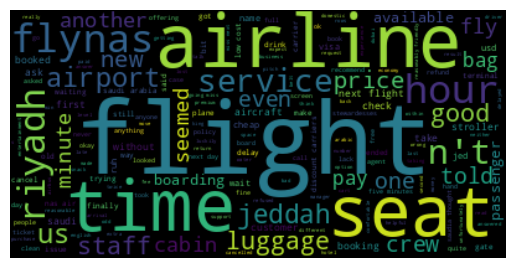

In [19]:

text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]

wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

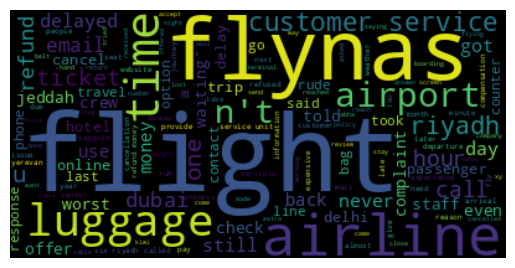

In [20]:
text2= " "
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

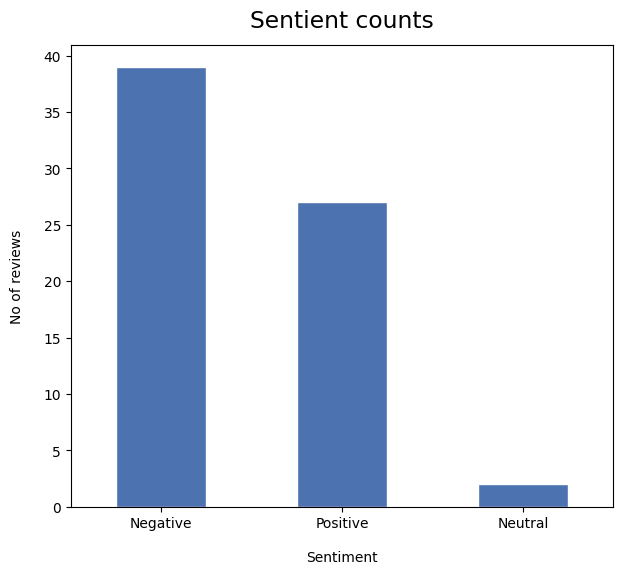

In [21]:

df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentient counts", y=1.02);
plt.grid(False)